               loss           mae           mse  epoch
0      1.825099e+09  42495.390625  1.825099e+09      0
1      1.825062e+09  42494.968750  1.825062e+09      1
2      1.825026e+09  42494.546875  1.825026e+09      2
3      1.824989e+09  42494.121094  1.824989e+09      3
4      1.824952e+09  42493.695312  1.824952e+09      4
...             ...           ...           ...    ...
49995  6.893951e+05    689.342773  6.893951e+05  49995
49996  6.893943e+05    689.433594  6.893943e+05  49996
49997  6.893930e+05    689.365234  6.893930e+05  49997
49998  6.893940e+05    689.409180  6.893940e+05  49998
49999  6.893912e+05    689.387695  6.893912e+05  49999

[50000 rows x 4 columns]


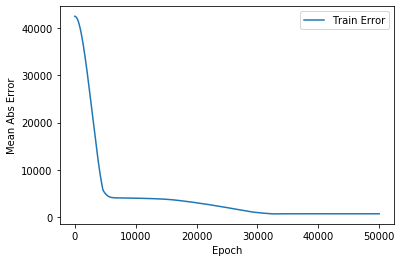

2/1 - 0s

 Prediction using the developed model 
 Evaluation input:   [[30], [36]] 
 Predicted values:   [[39848.477]
 [43030.293]]


In [2]:
"""
例題1：線形回帰モデル
施設の築後年数から保守コストを予想する
@author: t.imai
"""
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
 
from tensorflow import keras
from tensorflow.keras import layers

# この例題では、入力値を直接プラグラム文にかきこんでいる。普通は別ファイルから読み込む。
x_train = np.array([[33], [23], [39], [45]])
y_train = np.array([[41000], [36000], [46000], [47000]])

model = tf.keras.models.Sequential([
  keras.layers.Dense(100, activation='relu'),     
  keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

history = model.fit(x_train, y_train, epochs=50000, verbose=0)

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  print(hist)  

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.legend()  
  plt.show()

plot_history(history)

x_test = [[30], [36]]
y_test = model.predict(x_test, verbose=2)
print ("\n Prediction using the developed model", \
       "\n Evaluation input:  ", x_test, \
       "\n Predicted values:  ", y_test)